**Question 1**

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
school        0
sex           0
age           0
address       0
famsize       0
Pstatus 

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


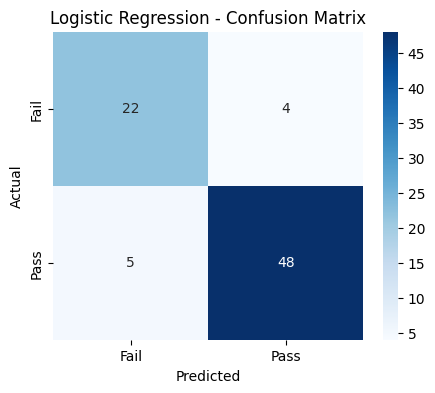

DT Accuracy: 86.08 %
DT Confusion matrix:  [[24  2]
 [ 9 44]]
DT Classification report:                precision    recall  f1-score   support

        Fail       0.73      0.92      0.81        26
        Pass       0.96      0.83      0.89        53

    accuracy                           0.86        79
   macro avg       0.84      0.88      0.85        79
weighted avg       0.88      0.86      0.86        79



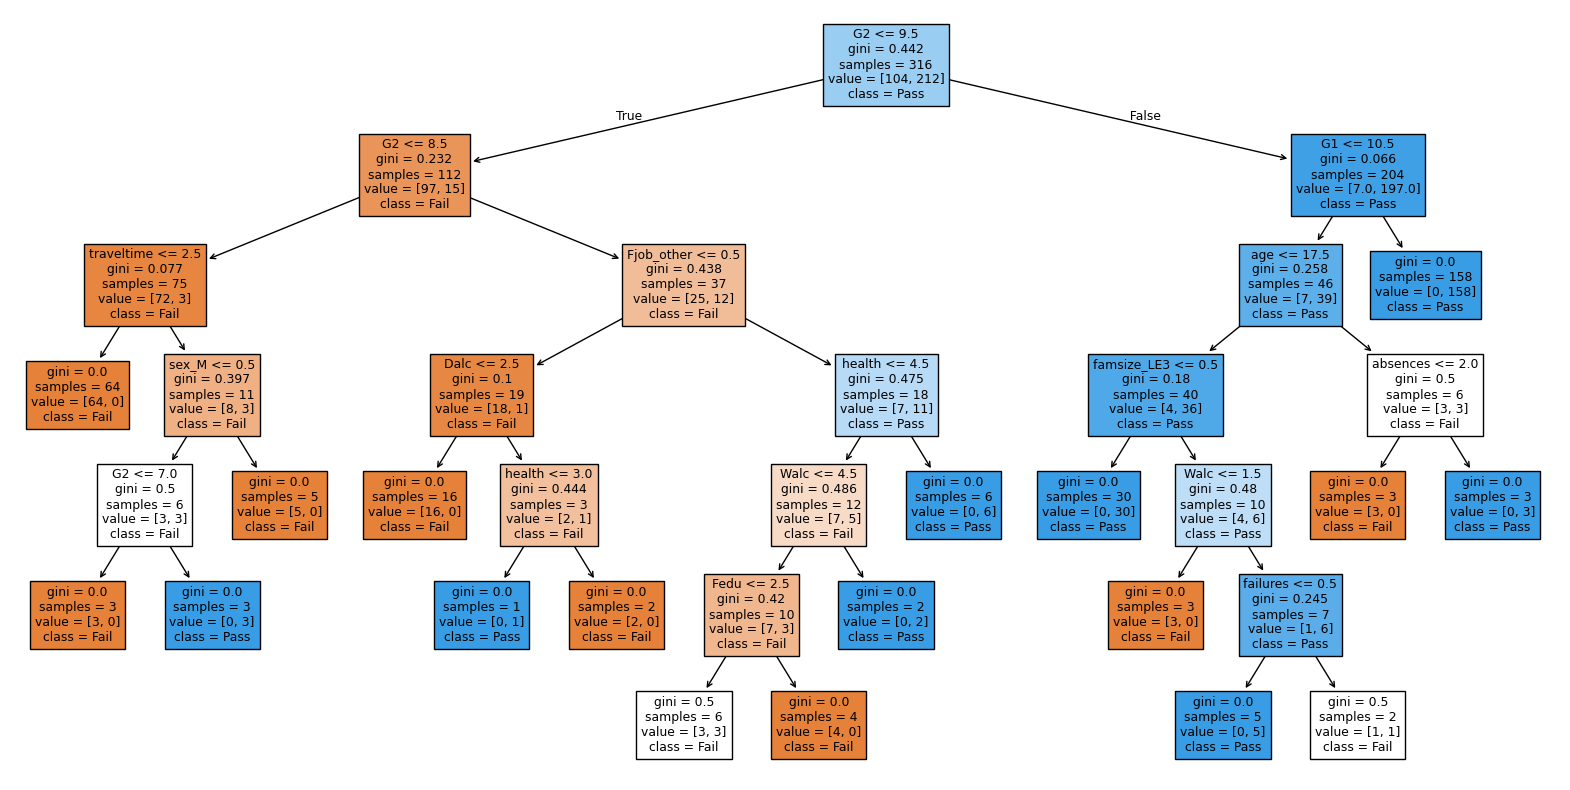

In [ ]:
#predicting student exam score
import numpy as np
import pandas as pd
#loading
data=pd.read_csv('student-mat.csv',sep=';')
df=pd.DataFrame(data)
#exploring
print(df.head())
print(df.isnull().sum()) #tells me that there is no missing values

X=df.drop(['G3'],axis=1)
y=df['G3'].apply(lambda x: 1 if x>=10 else 0)
#encoding categorical ones
X=pd.get_dummies(X, drop_first=True)

#splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

#scaling
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.fit_transform(X_test)

#training on logistic regression
from sklearn.linear_model import LogisticRegression
logistic= LogisticRegression(max_iter=200,random_state=42, multi_class='auto')
logistic.fit(X_train_scaled,y_train)

#prediction
y_pred=logistic.predict(X_test_scaled)

#evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f} %")
cm=confusion_matrix(y_test, y_pred)
print("Confusion matrix: ",cm)
cr=classification_report(y_test,y_pred, target_names=["Fail","Pass"])
print("Classification report: ",cr)

#interpretation (i am using confusion matrix heatmap as it correctly tells right and wrong predictions)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Fail","Pass"],
            yticklabels=["Fail","Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


#training and prediction, evaluation on decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42, max_depth=6)
dt.fit(X_train,y_train)
y_pred_t=dt.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy= accuracy_score(y_test, y_pred_t)
print(f"DT Accuracy: {accuracy*100:.2f} %")
cm=confusion_matrix(y_test, y_pred_t)
print("DT Confusion matrix: ",cm)
cr=classification_report(y_test,y_pred_t, target_names=["Fail","Pass"])
print("DT Classification report: ",cr)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["Fail","Pass"], filled=True)
plt.show()




**Question 2**

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
5    -122.25  2.697  
6    -122

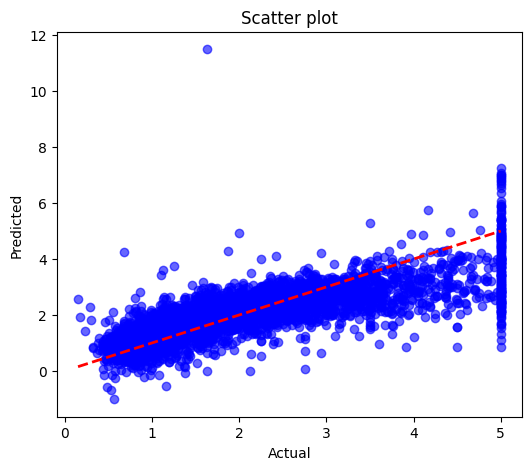

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
#loading
housing= fetch_california_housing()

X= housing.data
y= housing.target

feature_names= housing.feature_names
df=pd.DataFrame(X, columns=feature_names)
df['Price']=y

#exploring
print(df.head(10))
print(df.isnull().sum())

#split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

#preprocessing
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
X_train_scaled= scalar.fit_transform(X_train)
X_test_scaled= scalar.transform(X_test)

#linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred=lr.predict(X_test_scaled)

# #Random forest regressor
# from sklearn.ensemble import RandomForestRegressor
# rf=RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# y_pred=rf.predict(X_test)


#evaluation
from sklearn.metrics import mean_squared_error, r2_score
rmse=mean_squared_error(y_test, y_pred)
print(f"Rmse: {rmse*100 :.2f}%")

r2=r2_score(y_test, y_pred)
print(f"R2 score: {r2*100 :.2f}%")

#interpretation
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.title("Scatter plot")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--',linewidth=2)
plt.show()


#test
# test_data={
#     'MedInc':[8.334],
#     'HouseAge':[42.0],
#     'AveRooms':[6.1],
#     'AveBedrms':[1.0],
#     'Population':[310],
#     'AveOccup':[2.66],
#     'Latitude':[36.8],
#     'Longitude':[-123.0]
# }
# test_df=pd.DataFrame(test_data)
# scaled=scalar.transform(test_df)
# predict=lr.predict(scaled)
# print("Predicted Price: ",predict)




**Question 3**